<center><h1> A Data Analysis using Stackoverflow’s 2022 and 2023 Annual Developer Survey.</h1></center>
<h3> Data Stack Overflow Annual Developer Survey: https://insights.stackoverflow.com/survey </h3>

## The CRISP-DM process:

1. Business Understanding
2. Data Understanding
3. Prepare Data
4. Data Modeling
5. Evaluate the Results


# Business Understanding
In this notebook, I will delve into the Stack Overflow survey results for the years 2022 and 2023, aiming to extract insights related to professional developers and career prospects in Vietnam.

To achieve this, I will address three key questions:

1. Which programming languages are predominantly used in professional work, and which ones are in high demand, based on the Stack Overflow survey data from 2022 and 2023?

2. How is the usage of programming languages in the workplace correlated with the programming languages that people in Vietnam aspire to learn, as indicated in the Stack Overflow survey data of 2022 and 2023?

3. What are the most sought-after programming languages in Vietnam, as revealed by the Stack Overflow survey data for 2022 and 2023?

# Data Understanding

To gain insights into the data, the following steps need to be undertaken:

* Address categorical and missing data
* Analyze, model, and visualize the information.

In [1]:
# Import necessary Python libraries for dataset manipulation
import numpy as np
import pandas as pd
from collections import Counter

# Create visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Display plots within Jupyter Notebook
%matplotlib inline

# Configure display options to show all columns in the dataframe
pd.pandas.set_option('display.max_columns', None)


# from jupyterthemes import jtplot
# jtplot.style(theme='onedork')

In [2]:
# Loading Stackoverflow survey data of 2022 and 2023
data_2022 = pd.read_csv('stack-overflow-developer-survey-2022/survey_results_public.csv')
data_2023 = pd.read_csv('stack-overflow-developer-survey-2023/survey_results_public.csv')

In [8]:
#Sample data of 2022
data_2022.head(2)

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,VCHostingPersonal use,VCHostingProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,CAD\tCanadian dollar,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,macOS,Windows Subsystem for Linux (WSL),Git,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very unfavorable,Collectives on Stack Overflow;Stack Overflow f...,Daily or almost daily,Yes,Daily or almost daily,Not sure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN


In [10]:
data_2023.head(2)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0


The data for us know that this one have many columns and each columns have a describe. We need consider analysis some insight to learn about it. 

## Question 1: Which programming languages are predominantly used in professional work, and which ones are in high demand, based on the Stack Overflow survey data from 2022 and 2023?

### Prepare Data

In [7]:
data_2022.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

In [9]:
data_2023.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [25]:
data_2022['Country'].unique()

array([nan, 'Canada',
       'United Kingdom of Great Britain and Northern Ireland', 'Israel',
       'United States of America', 'Germany', 'India', 'Netherlands',
       'Croatia', 'Australia', 'Russian Federation', 'Czech Republic',
       'Austria', 'Serbia', 'Italy', 'Ireland', 'Poland', 'Slovenia',
       'Iraq', 'Sweden', 'Madagascar', 'Norway', 'Taiwan',
       'Hong Kong (S.A.R.)', 'Mexico', 'France', 'Brazil', 'Lithuania',
       'Uruguay', 'Denmark', 'Spain', 'Egypt', 'Turkey', 'South Africa',
       'Ukraine', 'Finland', 'Romania', 'Portugal', 'Singapore', 'Oman',
       'Belgium', 'Chile', 'Bulgaria', 'Latvia', 'Philippines', 'Greece',
       'Belarus', 'Saudi Arabia', 'Kenya', 'Switzerland', 'Iceland',
       'Viet Nam', 'Thailand', 'China', 'Montenegro', 'Slovakia', 'Japan',
       'Luxembourg', 'Turkmenistan', 'Argentina', 'Hungary', 'Tunisia',
       'Bangladesh', 'Maldives', 'Dominican Republic', 'Jordan',
       'Pakistan', 'Nepal', 'Iran, Islamic Republic of...', 'I

In [26]:
'Viet Nam' in data_2022['Country'].unique()

True

In [32]:
#First make copy of dataframe and then Filter a dataframe by country 
def filter_country(df, column_filter, country, columns): 
    '''
    Filter a dataframe by country
    Returns filtred dataframe
    '''
    
    df_copy = df
    
    for column in columns: 
        df_copy = df_copy[df_copy[column_filter] == country].dropna(subset=[column])
        
    return df_copy

# Filter the dataframe 
data_2022_filter = filter_country(data_2022, 'Country', 'Viet Nam', ['LanguageHaveWorkedWith', 'LanguageWantToWorkWith'])
data_2023_filter = filter_country(data_2023, 'Country', 'Viet Nam', ['LanguageHaveWorkedWith', 'LanguageWantToWorkWith'])

In [29]:
data_2022_filter.head(1)

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,VCHostingPersonal use,VCHostingProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
350,351,I am learning to code,"Student, full-time",NaN,NaN,"Secondary school (e.g. American high school, G...",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Coursera;Codecademy,4,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,NaN,NaN,C;C++;JavaScript;Julia;Python;Rust;TypeScript,Clojure;Elixir;F#;Julia;OCaml;Rust,MongoDB,NaN,NaN,NaN,Express;Next.js;Node.js;React.js,Deno;Phoenix,Electron;NumPy;Pandas,Capacitor;Scikit-learn;Torch/PyTorch,npm,NaN,Neovim;Visual Studio Code,Neovim;Visual Studio Code,NaN,Linux-based;Windows;Windows Subsystem for Linu...,Git,Command-line,NaN,NaN,NaN,NaN,Zoom,NaN,Indifferent,Stack Overflow;Stack Exchange,A few times per week,No,NaN,"No, not really",18-24 years old,Man,No,Straight / Heterosexual,Asian;Southeast Asian,None of the above,None of the above,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN


In [31]:
data_2023.tail(1)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
89183,89184,I agree,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,Formal documentation provided by the owner of ...,Codecademy;Pluralsight;Coursera,17,12,"Developer, full-stack",100 to 499 employees,I have some influence,NaN,Start a free trial;Ask developers I know/work ...,"Iran, Islamic Republic of...",IRR\tIranian rial,3.300000e+09,C#;Go;JavaScript;SQL;TypeScript,C#;Go;JavaScript;SQL;TypeScript,Microsoft SQL Server;Redis;SQLite,Microsoft SQL Server;Redis;SQLite,Hetzner,Hetzner;Microsoft Azure,Angular;ASP.NET;ASP.NET CORE;Blazor;Node.js,Angular;ASP.NET;ASP.NET CORE;Blazor;Deno;Node....,.NET (5+) ;.NET Framework (1.0 - 4.8),.NET (5+) ;Apache Kafka;RabbitMQ;Tauri,Docker;npm;NuGet;pnpm;Vite;Webpack;Yarn,Bun;Docker;npm;NuGet;pnpm;Vite;Yarn,Visual Studio;Visual Studio Code,Visual Studio;Visual Studio Code,Windows,Windows,NaN,NaN,Google Meet;Skype;Telegram;Whatsapp,Google Meet;Skype;Telegram;Whatsapp,ChatGPT,ChatGPT,GitHub Copilot,GitHub Copilot,Stack Overflow,A few times per week,Yes,Less than once per month or monthly,"Yes, somewhat",NaN,Yes,Favorable,Increase productivity;Greater efficiency;Speed...,Neither trust nor distrust,Learning about a codebase;Writing code,Learning about a codebase;Writing code,NaN,Learning about a codebase,NaN,NaN,NaN,Writing code,Yes,People manager,14.0,Agree,Neither agree nor disagree,Neither agree nor disagree,Strongly agree,Strongly agree,Agree,Neither agree nor disagree,Neither agree nor disagree,Never,1-2 times a week,1-2 times a week,60-120 minutes a day,30-60 minutes a day,DevOps function;Developer portal or other cent...,"Information Services, IT, Software Development...",Appropriate in length,Easy,NaN


In [33]:
#Spliting the columns
def split_column(df, column):
    '''
    Split column by ;,
    Returns a splited series.
    '''
    df_copy = df
    columnSeries = df_copy[column].apply(lambda x: x.split(';'))
    return columnSeries

# Splitting the dataframe by columns.
worked_languages_2022 = split_column(data_2022_filter, 'LanguageHaveWorkedWith')
wanted_languages_2022 = split_column(data_2022_filter, 'LanguageWantToWorkWith')

worked_languages_2023 = split_column(data_2023_filter, 'LanguageHaveWorkedWith')
wanted_languages_2023 = split_column(data_2023_filter, 'LanguageWantToWorkWith')

In [34]:
#Just Flating a nested list
def flat(array_list):
    '''
    Flat a nested list,
    Returns a flat list.
    '''
    object_list = []
    for row in array_list:
        for obj in row:
            object_list.append(obj.strip())
            
    return object_list

# Flatting nested list objects.
list_worked_languages_2022 = flat(worked_languages_2022)
list_wanted_languages_2022 = flat(wanted_languages_2022)

list_worked_languages_2023 = flat(worked_languages_2023)
list_wanted_languages_2023 = flat(wanted_languages_2023)

In [50]:
def list_of_group(data_list, year):
    '''
    Group by count to a list,
    Returns a result dict
    '''
    grouped_list = dict(Counter(data_list))
    grouped_dict = [{'Programming Language':key, 'Count': value, 'Year': year} for key, value in grouped_list.items()]
    return grouped_dict

# Grouping the list and creating a dict.
dict_worked_languages_2022 = list_of_group(list_worked_languages_2022, '2022')
dict_wanted_languages_2022 = list_of_group(list_wanted_languages_2022, '2022')

dict_worked_languages_2023 = list_of_group(list_worked_languages_2023, '2023')
dict_wanted_languages_2023 = list_of_group(list_wanted_languages_2023, '2023')

In [51]:
dict_worked_languages_2022

[{'Programming Language': 'C', 'Count': 77, 'Year': '2022'},
 {'Programming Language': 'C++', 'Count': 87, 'Year': '2022'},
 {'Programming Language': 'JavaScript', 'Count': 191, 'Year': '2022'},
 {'Programming Language': 'Julia', 'Count': 9, 'Year': '2022'},
 {'Programming Language': 'Python', 'Count': 128, 'Year': '2022'},
 {'Programming Language': 'Rust', 'Count': 33, 'Year': '2022'},
 {'Programming Language': 'TypeScript', 'Count': 104, 'Year': '2022'},
 {'Programming Language': 'C#', 'Count': 92, 'Year': '2022'},
 {'Programming Language': 'HTML/CSS', 'Count': 147, 'Year': '2022'},
 {'Programming Language': 'Java', 'Count': 115, 'Year': '2022'},
 {'Programming Language': 'PHP', 'Count': 54, 'Year': '2022'},
 {'Programming Language': 'Ruby', 'Count': 15, 'Year': '2022'},
 {'Programming Language': 'SQL', 'Count': 130, 'Year': '2022'},
 {'Programming Language': 'Dart', 'Count': 32, 'Year': '2022'},
 {'Programming Language': 'Kotlin', 'Count': 25, 'Year': '2022'},
 {'Programming Languag

In [52]:
dict_worked_languages_2023

[{'Programming Language': 'C#', 'Count': 99, 'Year': '2023'},
 {'Programming Language': 'C++', 'Count': 122, 'Year': '2023'},
 {'Programming Language': 'HTML/CSS', 'Count': 199, 'Year': '2023'},
 {'Programming Language': 'Java', 'Count': 158, 'Year': '2023'},
 {'Programming Language': 'JavaScript', 'Count': 245, 'Year': '2023'},
 {'Programming Language': 'Objective-C', 'Count': 7, 'Year': '2023'},
 {'Programming Language': 'PowerShell', 'Count': 43, 'Year': '2023'},
 {'Programming Language': 'Python', 'Count': 164, 'Year': '2023'},
 {'Programming Language': 'Swift', 'Count': 14, 'Year': '2023'},
 {'Programming Language': 'TypeScript', 'Count': 121, 'Year': '2023'},
 {'Programming Language': 'SQL', 'Count': 181, 'Year': '2023'},
 {'Programming Language': 'Go', 'Count': 48, 'Year': '2023'},
 {'Programming Language': 'C', 'Count': 87, 'Year': '2023'},
 {'Programming Language': 'Visual Basic (.Net)', 'Count': 9, 'Year': '2023'},
 {'Programming Language': 'Groovy', 'Count': 10, 'Year': '202

### Data Modelling

In [53]:
def create_dataframe(data_dicts): 
    '''
    Create two dataframes and merge them,
    Returns an appended dataframe.
    '''
    df1 = pd.DataFrame(data_dicts[0])
    df2 = pd.DataFrame(data_dicts[1])
    df = pd.concat([df1, df2], ignore_index=True)
    return df

worked_languages = create_dataframe([dict_worked_languages_2022, dict_worked_languages_2023])
wanted_languages = create_dataframe([dict_wanted_languages_2022, dict_wanted_languages_2023])


In [54]:
def percentage(df, column):
    '''
    Calculate percentages and add to the dataframe.
    '''
    total_counts = df.groupby(column)['Count'].transform('sum')
    percentages = df['Count'] / total_counts
    return percentages

worked_languages['Percentage'] = percentage(worked_languages, 'Year')
wanted_languages['Percentage'] = percentage(wanted_languages, 'Year')


In [55]:
# Get the top 10 languages
top_20_work = worked_languages.sort_values(by=['Percentage'], ascending=False).head(20)['Programming Language'].unique()
top_20_want = wanted_languages.sort_values(by=['Percentage'], ascending=False).head(20)['Programming Language'].unique()

worked_chart = worked_languages[worked_languages['Programming Language'].isin(top_20_work)]
wanted_chart = wanted_languages[wanted_languages['Programming Language'].isin(top_20_want)]

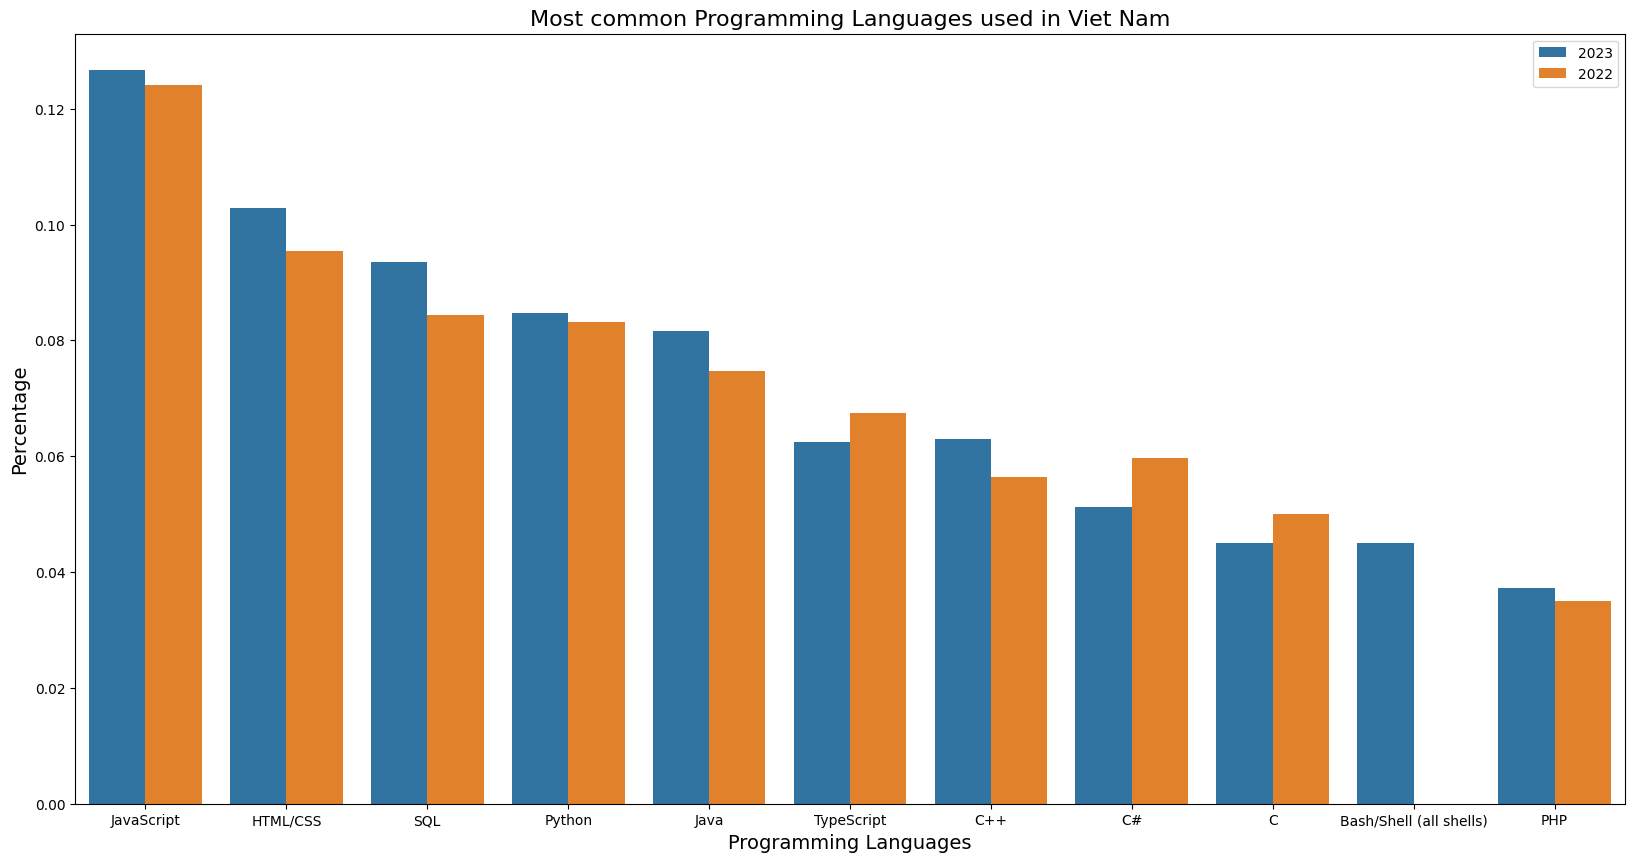

In [56]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'Programming Language', 
            y = 'Percentage',
            hue = 'Year',
            data = worked_chart.sort_values(by='Percentage', ascending=False))

plt.xlabel("Programming Languages", fontsize = 14)
plt.ylabel("Percentage", fontsize = 14)
plt.legend(title_fontsize='40')
plt.title('Most common Programming Languages used in Viet Nam', size = 16)
plt.show()

## Evaluate the Results

* JavaScript is the dominant language throughout 2022 and early 2023, with a substantial lead over other languages. This indicates its prominence in the Vietnamese market for web development.

* Following closely behind JavaScript is HTML/CSS, showing a notable upward trend. This trend highlights the strong emphasis on web design and development in Vietnam.

* Languages with straightforward syntax and robust frameworks, such as Python and Java, maintain a significant presence, securing a place in the top 5. On the other hand, lighter languages with complex syntax, like C and C++, are on a declining trajectory.

* Languages in high-demand sectors such as AI and data, including Python and SQL, exhibit significant improvements, resulting in higher rankings compared to previous years.

## Question 2:  How is the usage of programming languages in the workplace correlated with the programming languages that people in Vietnam aspire to learn, as indicated in the Stack Overflow survey data of 2022 and 2023?

### Prepare Data

In [58]:
row = []
for j in list(zip(worked_languages_2022, wanted_languages_2023)):
    for i in j[0]:
        row.append({
            'Worked_Programming_Languages': i, 
            'Wanted_Programming_Languages': Counter(j[0])
        })
        
programming_language_transition = pd.DataFrame(row).groupby('Worked_Programming_Languages')\
                                            .agg({'Wanted_Programming_Languages': 'sum'}).reset_index()

### Data Modeling

In [59]:
for row in programming_language_transition['Worked_Programming_Languages']:
    programming_language_transition[row] = 0

for index, row in programming_language_transition.iterrows():
    total = sum([value for key, value in dict(row['Wanted_Programming_Languages']).items()])
    for key, value in dict(row['Wanted_Programming_Languages']).items():
         programming_language_transition[key].loc[index] = (value / total)

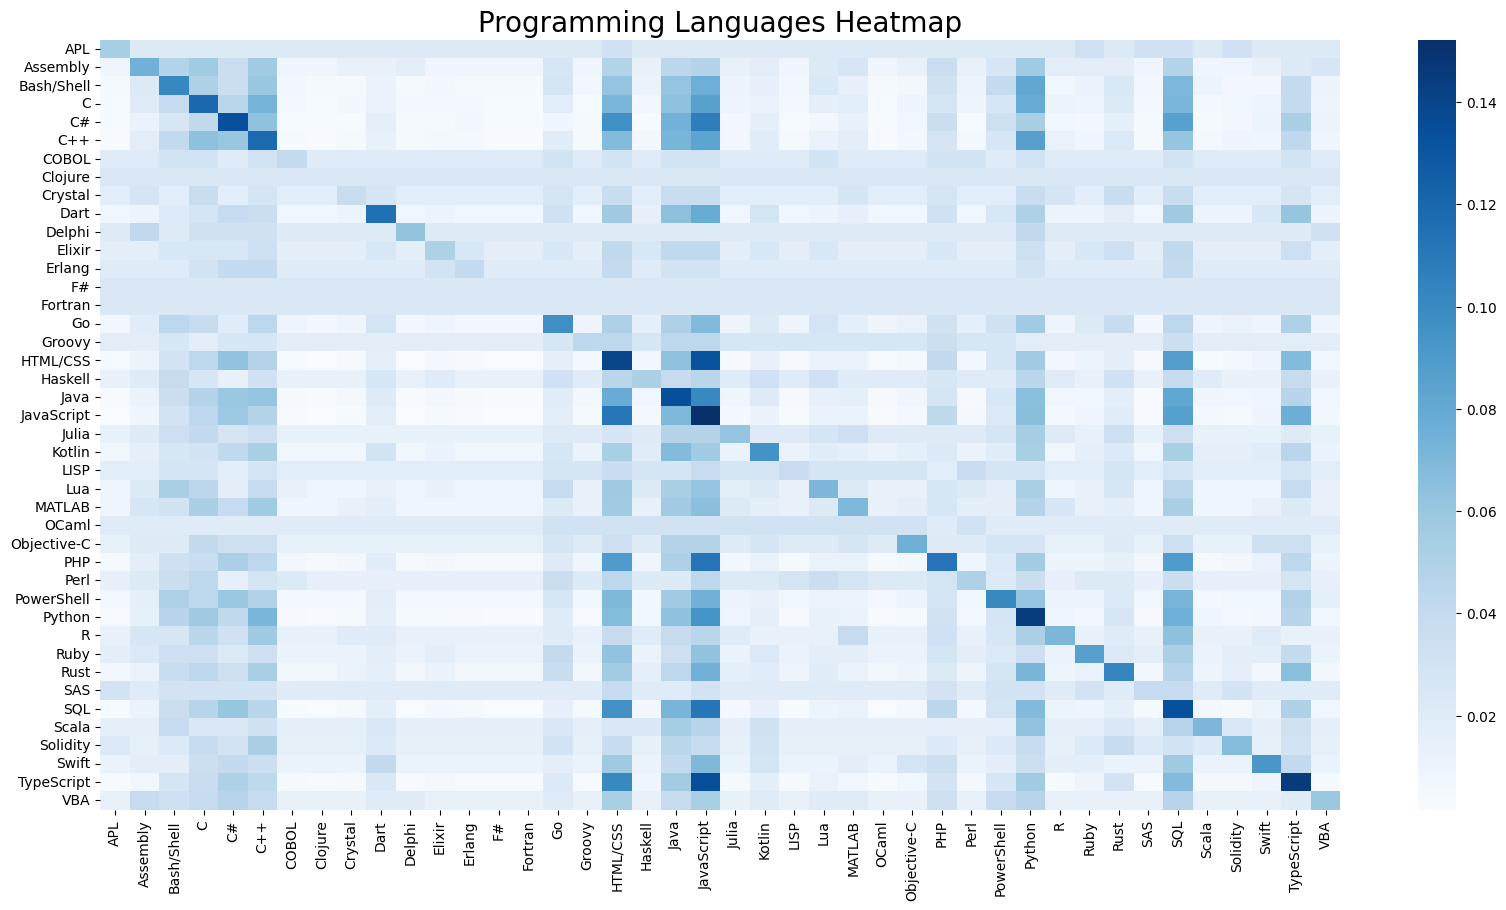

In [60]:
prlt = programming_language_transition.drop('Wanted_Programming_Languages', axis=1)\
                                        .set_index('Worked_Programming_Languages')

plt.figure(figsize=(20, 10))
sns.heatmap(prlt, cmap = "Blues")
plt.title('Programming Languages Heatmap', size = 20)
plt.ylabel('')
plt.show()

## Evaluate the Results

Based on the correlation chart:

* Certain languages exhibit strong correlations with others, such as HTML/CSS with JS, HTML/CSS with PHP, SQL. Notably, there is a robust correlation between HTML/CSS and TypeScript.

* Python and JavaScript also appear to be powerful languages with significant correlations with numerous other languages.

## Question 3: What are the most sought-after programming languages in Vietnam, as revealed by the Stack Overflow survey data for 2022 and 2023?

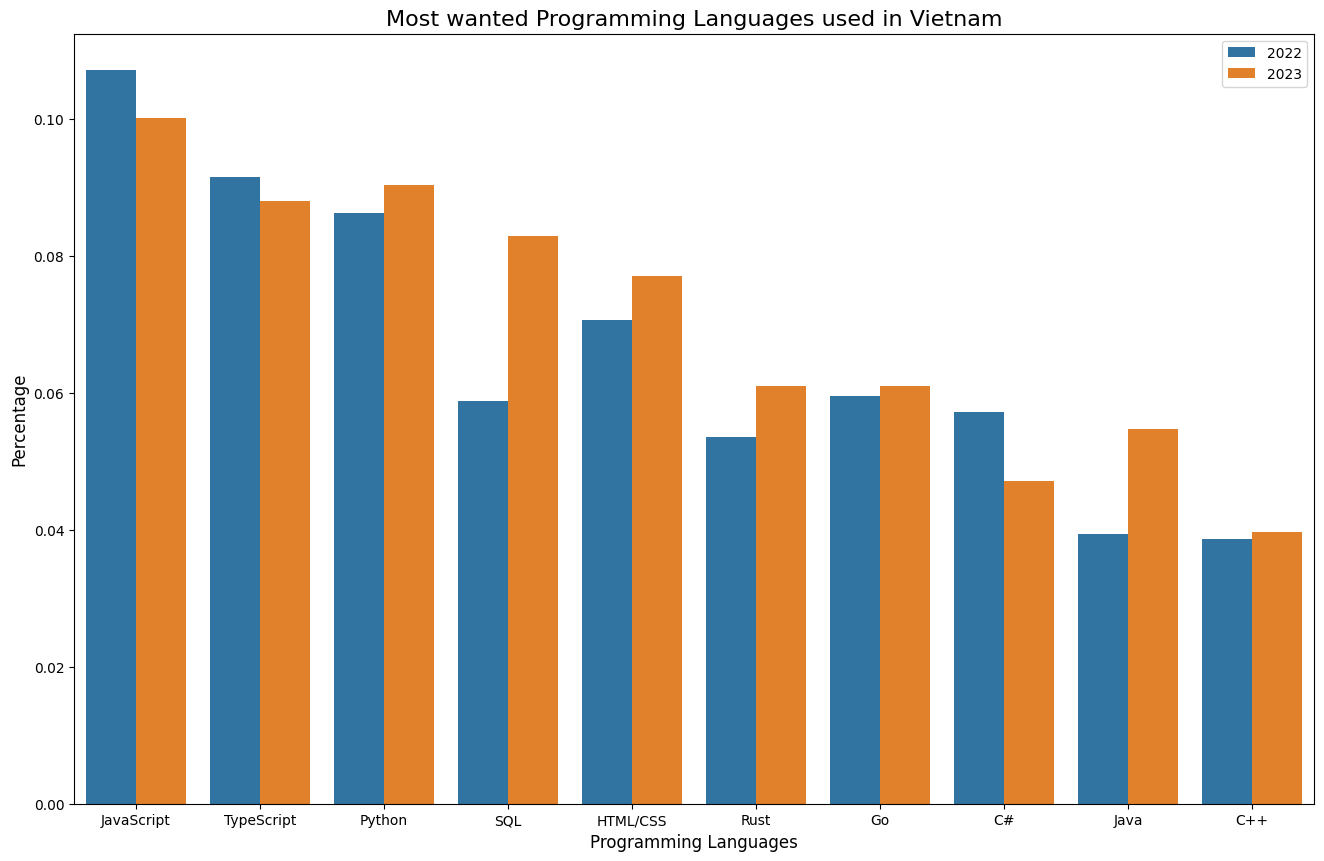

In [62]:
plt.figure(figsize=(16,10))
sns.barplot(x = 'Programming Language', 
            y = 'Percentage',
            hue = 'Year',
            data = wanted_chart.sort_values(by='Percentage', ascending=False))

plt.title('Most wanted Programming Languages used in Vietnam', size = 16)
plt.xlabel("Programming Languages", fontsize = 12)
plt.ylabel("Percentage", fontsize = 12)
plt.legend(title_fontsize='40')
plt.show()

## Evaluate the Results

* Compared to the chart depicting past trends, JavaScript still holds the top position.
* A noticeable difference is evident between the orange and green columns.
* TypeScript is emerging as a significant trend.